(?, 2)
(150, 4)
(150,)
=========== Epoch: 0 ===========
('Loss', 1.8062341)
('Accuracy', 0.37142858)
('Y_prediction ', array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32))
('True', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1]))
=========== Epoch: 1000 ===========
('Loss', 0.43811479)
('Accuracy', 0.78095239)
('Y_prediction ', array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int32))
('True', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1]))
=========== Epoch: 2000 ===========
('Loss', 0.41275626)
('Accuracy', 0.80952382)
('Y_prediction ', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int32))
('True', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1]))
=========== Epoch: 3000 ===========
('Loss', 0.39908436)
('Accuracy', 0.81904763)
('Y_prediction ', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int32))
('True', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1]))
=========== Epoch: 4000 ===========
('Loss', 0.39119452)
('Accuracy', 0.81904763)
('Y_prediction ', array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int32))
('True', array([0, 1, 1, 1, 1

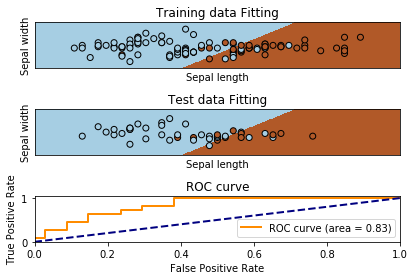

In [2]:
#################
### Logistic Regression with  Tensorflow
#################
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics
import math


### define hyperparameters
n_classes = 2
n_features = 2

learning_rate = 0.1
max_iter = 10000

### define graph
x = tf.placeholder(tf.float32, shape=[None, n_features], name="X")
y_label = tf.placeholder(tf.int32, shape=[None], name="Y_label")
# one-hot encoding
y = tf.one_hot(indices=y_label, depth=n_classes)

# hidden 1
W = tf.Variable(
      tf.truncated_normal([n_features, n_classes],
                          stddev=1.0),
      name='weights')
B = tf.Variable(
      tf.zeros([n_classes]),
      name='biases')

logits = tf.matmul(x, W) + B
scores = tf.nn.softmax( logits )


pred = tf.cast( tf.argmax(logits, 1), tf.int32 )
accuracy = tf.reduce_mean( tf.cast( tf.equal(pred, y_label), tf.float32 ))

### define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)





### define input data
# Load the iris dataset
iris = datasets.load_iris()

# iris has two attributes: data, target
print(iris.data.shape)
print(iris.target.shape)

# in order to plot data, we select first two features
iris.data = iris.data[:,:2]
# for binary classification, set label 2 as true class while others are false class
iris.target[ iris.target != 2 ] = -1
iris.target[ iris.target == 2 ] = 1
iris.target[ iris.target == -1 ] = 0

# Split the data into training/testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(
  iris.data, iris.target, test_size=0.3, random_state=0)



### Starting sessions
with tf.Session() as sess:
  ## initialize variables
  init = tf.global_variables_initializer()
  sess.run(init)

  ## training
  for i in range(max_iter):
    _, accuracy_val, pred_val, loss_val = sess.run(
      [train_step, accuracy, pred, loss], 
      feed_dict={x: x_train, y_label: y_train})

    if i % 1000 == 0:
      print('=========== Epoch: %d ===========' % i)
      print('Loss', loss_val)
      print('Accuracy', accuracy_val)
      print('Y_prediction ', pred_val[:10])
      print('True', y_train[:10])


    if math.isnan(loss_val):
      print('LOSS is NAN!')
      break

  ### test
  # calculation for plotting grid
  h = 0.01
  x1_min, x1_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
  x2_min, x2_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
  x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
  Z = sess.run( pred, feed_dict={x: np.c_[x1.ravel(), x2.ravel()], y_label:[]} )

  # Put the result into a color plot
  Z = Z.reshape(x1.shape)

  # plotting
  fig = plt.figure()

  # plot training set
  subplot = fig.add_subplot(3, 1, 1)
  subplot.set_title("Training data Fitting")
  subplot.pcolormesh(x1, x2, Z, cmap=plt.cm.Paired)

  subplot.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
  subplot.set_xlabel('Sepal length')
  subplot.set_ylabel('Sepal width')

  subplot.set_xlim(x1.min(), x1.max())
  subplot.set_ylim(x2.min(), x2.max())
  subplot.set_xticks(())
  subplot.set_yticks(())


  # plot test set
  subplot = fig.add_subplot(3, 1, 2)
  subplot.set_title("Test data Fitting")
  subplot.pcolormesh(x1, x2, Z, cmap=plt.cm.Paired)

  subplot.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
  subplot.set_xlabel('Sepal length')
  subplot.set_ylabel('Sepal width')

  subplot.set_xlim(x1.min(), x1.max())
  subplot.set_ylim(x2.min(), x2.max())
  subplot.set_xticks(())
  subplot.set_yticks(())


  # plot roc curve for test set
  test_accuracy, pred_test, scores_test = sess.run( 
    [accuracy, pred, scores],
    feed_dict={x: x_test, y_label: y_test})
  print('---- evaluation ----')
  print('acc: %.4f' % test_accuracy)
  print('pred', pred_test)
  print('true', y_test)

  fpr, tpr, _ = metrics.roc_curve(y_true=y_test, y_score=scores_test[:,1:])
  roc_auc = metrics.auc(fpr, tpr)


  subplot = fig.add_subplot(3, 1, 3)
  subplot.set_title("ROC curve")
  lw = 2
  subplot.plot(fpr, tpr, color='darkorange',
           lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  subplot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  subplot.set_xlim([0.0, 1.0])
  subplot.set_ylim([0.0, 1.05])
  subplot.set_xlabel('False Positive Rate')
  subplot.set_ylabel('True Positive Rate')
  subplot.legend(loc="lower right")


  plt.tight_layout()
  plt.show()
